## Part A: Internet Data and the classical portfolio optimization problem (10 Marks)

Use historical data. You may consider at least 10 stock counters.

In [2]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2021,1,22)

### Import 10 JSE stocks from Yahoo finance

In [4]:
Shoprite = web.DataReader('SHP.JO', 'yahoo', start, end)
Exxaro = web.DataReader('EXX.JO','yahoo',start, end)
Naspers = web.DataReader('NPN.JO','yahoo',start, end)
Impala = web.DataReader('IMP.JO','yahoo',start,end)
First_Rand = web.DataReader('FSR.JO','yahoo',start, end)
Nedbank = web.DataReader('NED.JO','yahoo',start, end)
Sanlam= web.DataReader('SLM.JO','yahoo',start, end)
Gold_Fields = web.DataReader('GFI.JO','yahoo',start, end)
Richemont = web.DataReader('CFR.JO','yahoo',start, end)
RMB = web.DataReader('RMH.JO','yahoo',start, end)



In [5]:
stocks = pd.concat([Shoprite['Close'],Exxaro['Close'],Naspers['Close'],Impala['Close'],First_Rand['Close'],Nedbank['Close'],Sanlam['Close'],Gold_Fields['Close'],Richemont['Close'],RMB['Close'] ], axis =1)
stocks.columns = ['Shoprite','Exxaro','Naspers','Impala','First Rand','Nedbank','Sanlam','Gold Fields','Richemont','RMB']
stocks.tail(5)

,Shoprite,Exxaro,Naspers,Impala,First Rand,Nedbank,Sanlam,Gold Fields,Richemont,RMB
Date,,,,,,,,,,
2021-01-18,13435.0,15721.0,340860.0,21306.0,4926.0,12569.0,5770.0,14104.0,14570.0,137.0
2021-01-19,14094.0,15517.0,345000.0,22186.0,5008.0,12899.0,5751.0,13375.0,14200.0,142.0
2021-01-20,13733.0,15600.0,350000.0,21161.0,4957.0,12784.0,5838.0,13746.0,14375.0,140.0
2021-01-21,13784.0,16595.0,350000.0,22009.0,4935.0,12658.0,5815.0,14443.0,14255.0,140.0
2021-01-22,13663.0,16533.0,356400.0,21690.0,4817.0,12259.0,5810.0,14281.0,14575.0,142.0


Determine the Total returns of the stocks:
$$
\text{Return:} \quad r_t = \frac{r -r_{t-1} }{r_{t-1}} 
$$


In [6]:
returns = (stocks-stocks.shift(1))/stocks.shift(1)
returns = returns.iloc[1:,:]
returns

,Shoprite,Exxaro,Naspers,Impala,First Rand,Nedbank,Sanlam,Gold Fields,Richemont,RMB
Date,,,,,,,,,,
2017-01-03,0.008690,0.021788,0.010268,0.035564,0.011849,0.013060,0.014785,0.008029,-0.008045,0.009337
2017-01-04,-0.022781,-0.029634,-0.008409,0.018753,0.006877,-0.003855,0.017703,0.006827,-0.019553,0.009102
2017-01-05,-0.003609,0.000676,0.002334,0.044134,-0.028060,-0.027589,-0.018935,0.035262,-0.004079,-0.028833
2017-01-06,-0.006354,-0.001802,0.049017,-0.001699,0.011016,0.006077,0.012239,-0.008297,0.028331,0.014007
2017-01-09,0.006992,-0.002708,0.001457,-0.006170,0.002442,0.016461,0.002325,-0.009247,0.009073,0.001652
...,...,...,...,...,...,...,...,...,...,...
2021-01-18,-0.004520,0.024169,0.012981,-0.009438,-0.002834,0.006325,-0.002938,0.007429,0.030483,0.007353
2021-01-19,0.049051,-0.012976,0.012146,0.041303,0.016646,0.026255,-0.003293,-0.051687,-0.025395,0.036496
2021-01-20,-0.025614,0.005349,0.014493,-0.046200,-0.010184,-0.008915,0.015128,0.027738,0.012324,-0.014085


### Time Series of the total return

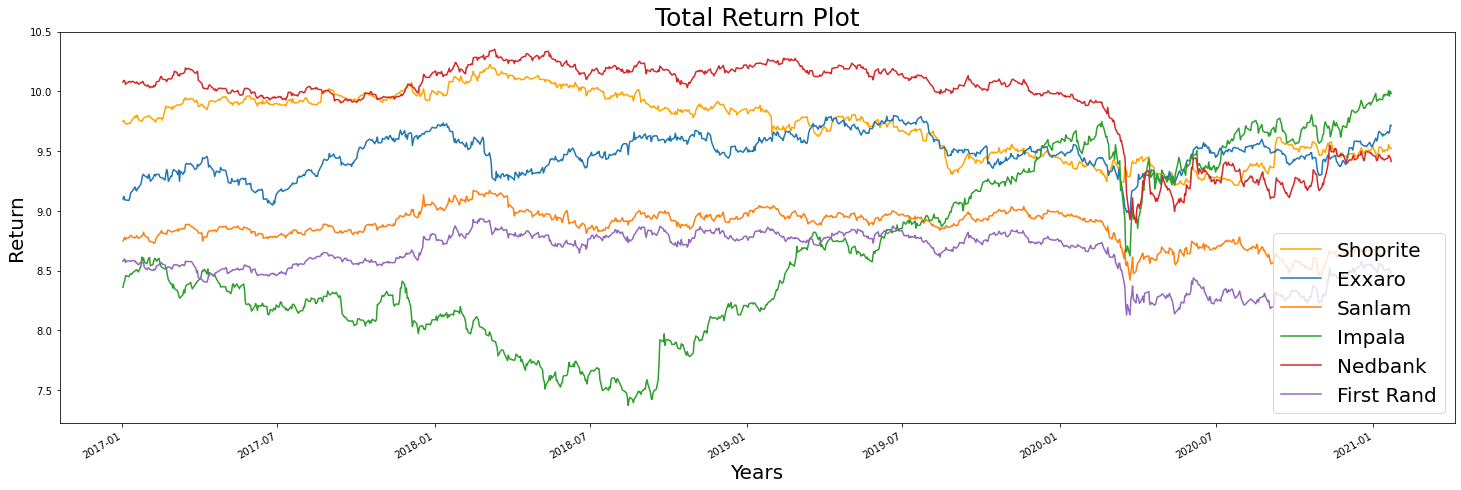

In [7]:
Total_returns_pd = pd.DataFrame(np.log(stocks))
# Plot
plt.figure(figsize = (25,8))
Total_returns_pd['Shoprite'].plot(label='Shoprite', color='orange')
Total_returns_pd['Exxaro'].plot(label='Exxaro')
Total_returns_pd['Sanlam'].plot(label='Sanlam')
Total_returns_pd['Impala'].plot(label='Impala')
Total_returns_pd['Nedbank'].plot(label='Nedbank')
Total_returns_pd['First Rand'].plot(label='First Rand')
# adding title to the plot
plt.title('Total Return Plot', fontsize=25)
  
# adding Label to the x-axis
plt.xlabel('Years', fontsize=20)
plt.ylabel('Return', fontsize=20)
# adding legend to the curve
plt.legend(fontsize=20)
plt.savefig('timeseries.png')

## Covariance Matrix

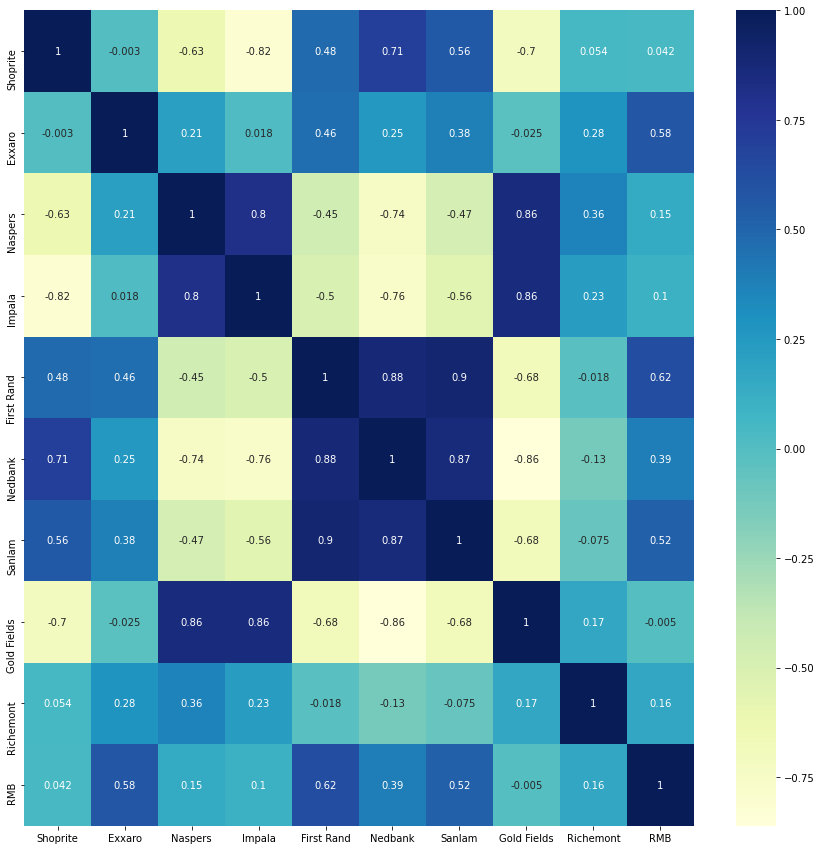

In [9]:
# plotting correlation heatmap
fig, ax = plt.subplots(figsize=(15,15))
dataplot = sb.heatmap(stocks.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap

plt.show()

## Optimization Problem

In This section, we setup the optimization problem, we will plot the efficient fronteir using MVO setup.

### MVO Problem
The MVO problem is set up as follows.:


$$\begin{aligned}
\text{min}: \quad &w^T \Sigma w   \\
st: \quad & \mu^{T} w \geq r_{min} \\
& w \geq 0 \\
& 1^T w = 1
\end{aligned}$$

## Return vs Volatility

In [10]:
#Obtain the annualized mean return
meanRet = returns.mean() * 253
meanRet

Shoprite       0.004921
Exxaro         0.240883
Naspers        0.313482
Impala         0.589756
First Rand     0.042764
Nedbank       -0.079330
Sanlam         0.039097
Gold Fields    0.443227
Richemont      0.152683
RMB            0.196401
dtype: float64

### Efficient Markowits Frontier

The MVO problem is set up as follows.:
The aim is to minimze the risk for a minimum accpetable return $r_{min}$. The weights need to be greater than zero and sum to 1.

$$\begin{aligned}
\underset{w}{\text{min}}: \quad &w^T \Sigma w   \\
st: \quad & \mu^{T} w \geq r_{min} \\
& w \geq 0 \\
& 1^T w = 1
\end{aligned}$$

In [114]:
from scipy.optimize import minimize 


returns1 = np.linspace(0,0.4,50)
volatility_opt = []
weights = []

#Obtain the covariance matrix of the returns, multiply by 253, for annual sd
Sigma = returns.cov() *253

#This function takes in weights and returns the volatility.
def minimizeMyOBF(w):
    w = np.array(w)
    V = np.dot(w.T, np.dot(Sigma,w))
    return V
#This function takes in weights and returns expected return.
def getReturn(w):
    w = np.array(w)
    R = np.sum(meanRet*w)
    return R

def checkSumToOne(w):
    return np.sum(w) -1
# w0 is an initial guess of the portfolio proportions
w0 = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
#Restrict the bounds of each portfolio.
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1))

for R in returns1:
    #find best volatility

    constraints = ({'type':'eq', 'fun':checkSumToOne},
                   {'type':'eq', 'fun':lambda w: getReturn(w) - R})
    opt = minimize(minimizeMyOBF, w0,method = 'SLSQP', bounds = bounds, constraints = constraints)
    #save my optimal volatility
    volatility_opt.append(np.sqrt(opt['fun'])*100)
    weights.append(opt.x)


In [115]:
opt.x

array([9.59993527e-18, 2.09001029e-02, 4.66100981e-01, 2.47759211e-01,
       0.00000000e+00, 8.85541026e-18, 2.04563735e-17, 2.08920464e-01,
       2.11976942e-02, 3.51215462e-02])

Text(0, 0.5, 'Portfolio Return, $E(r_p)$ (%) ')

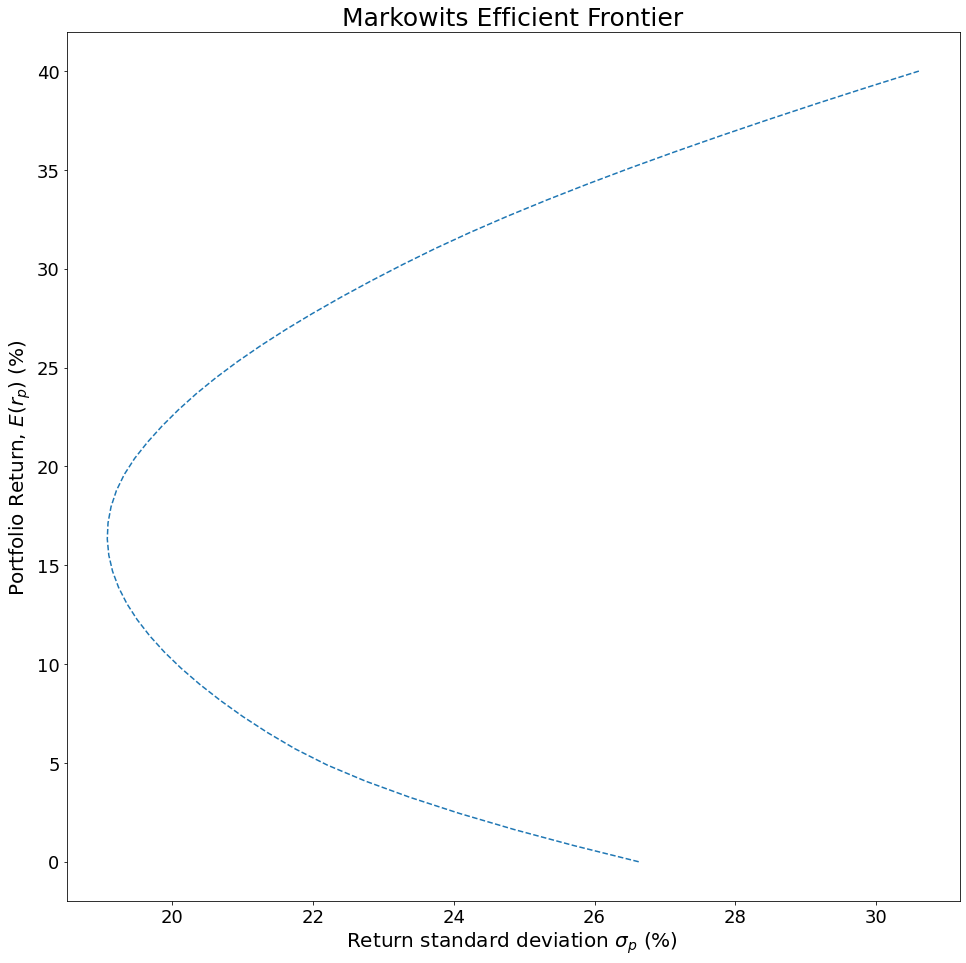

In [116]:
import matplotlib.ticker as mtick


plt.figure(figsize = (16,16))
plt.plot(volatility_opt,returns1*100, '--')
plt.title('Markowits Efficient Frontier', fontsize=25)
plt.xlabel('Return standard deviation $\sigma_p$ (%) ', fontsize=20)
plt.ylabel('Portfolio Return, $E(r_p)$ (%) ', fontsize=20)



## Composition of Effcient Portfolios

### Top portfolio options.

In [117]:

index = pd.DataFrame(volatility_opt)
df = pd.DataFrame(weights)
df.columns =['Shoprite','Exxaro','Naspers','Impala','First Rand','Nedbank','Sanlam','Gold Fields','Richemont','RMB']
df = df.assign(Returns=pd.DataFrame(returns1))
df.tail(5)


,Shoprite,Exxaro,Naspers,Impala,First Rand,Nedbank,Sanlam,Gold Fields,Richemont,RMB,Returns
45,0.000000e+00,0.039322,0.422618,0.195264,3.751212e-18,1.137740e-17,1.235319e-17,0.192680,0.106372,0.043743,0.367347
46,0.000000e+00,0.033583,0.433418,0.208423,1.393543e-17,3.387024e-17,2.262042e-18,0.196977,0.085392,0.042205,0.375510
47,0.000000e+00,0.030260,0.444274,0.221751,3.930195e-18,1.138374e-18,0.000000e+00,0.200424,0.063741,0.039548,0.383673
48,1.590846e-17,0.025561,0.455148,0.234707,0.000000e+00,0.000000e+00,2.546819e-19,0.204758,0.042392,0.037434,0.391837
49,9.599935e-18,0.020900,0.466101,0.247759,0.000000e+00,8.855410e-18,2.045637e-17,0.208920,0.021198,0.035122,0.400000


Text(0.5, 0, 'Expected Returns')

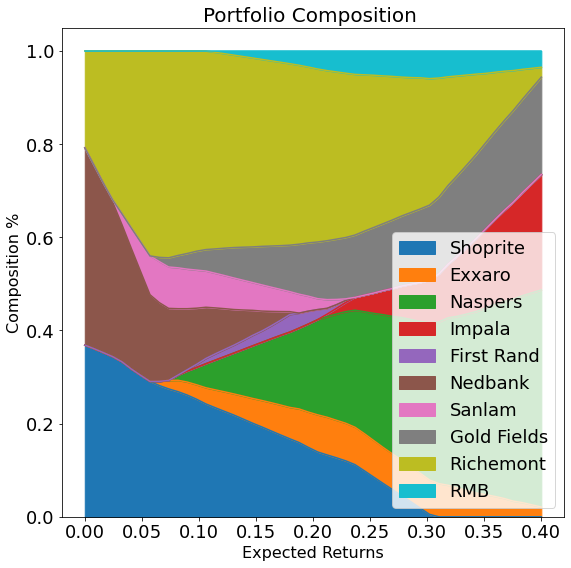

In [118]:
df.plot(kind= 'area',x='Returns',stacked = True,figsize = (9,9))
plt.title("Portfolio Composition ",fontsize = 20)
plt.ylabel('Composition %', fontsize = 16) 
plt.xlabel('Expected Returns',fontsize = 16)

## Part B: Internet Data and the large-scale portfolio optimization problem
#### Problem 8.6

#### Problem 8.7

Using historical returns of the stocks in the DJIA, estimate their mean $\mu_i$ and covariance matrix. Let R be the median of the  $\mu_i s$

(i) Solve Markowitz's MVO model to construct a portfolio of stocks from
the DJIA that has expected return at least R.
The mean $\mu_i$ and covariance matrix are given as :

The MVO problem is set up as follows.:


$$\begin{aligned}
\text{min}: \quad &w^T \Sigma w   \\
st: \quad & \mu^{T} w \geq r_{min} \\
& w \geq 0 \\
& 1^T w = 1
\end{aligned}$$

where $r_{min} = R$ is the median of $\mu_i$

In [119]:

medianReturns = np.median(returns)
medianReturns

0.00028596132808835883

#### Mean Historical Returns

In [120]:
#Obtain the annualized mean return
meanRet = returns.mean() * 253
meanRet

Shoprite       0.004921
Exxaro         0.240883
Naspers        0.313482
Impala         0.589756
First Rand     0.042764
Nedbank       -0.079330
Sanlam         0.039097
Gold Fields    0.443227
Richemont      0.152683
RMB            0.196401
dtype: float64

### Stock Covariance Matrix

In [121]:
returns.cov()

,Shoprite,Exxaro,Naspers,Impala,First Rand,Nedbank,Sanlam,Gold Fields,Richemont,RMB
Shoprite,0.000485,0.000079,0.000086,0.000074,0.000229,0.000216,0.000220,0.000009,0.000022,0.000194
Exxaro,0.000079,0.000700,0.000140,0.000349,0.000158,0.000159,0.000147,0.000116,0.000097,0.000101
Naspers,0.000086,0.000140,0.000449,0.000175,0.000128,0.000092,0.000135,0.000069,0.000089,0.000115
Impala,0.000074,0.000349,0.000175,0.001476,0.000188,0.000224,0.000179,0.000548,0.000162,0.000137
First Rand,0.000229,0.000158,0.000128,0.000188,0.000532,0.000458,0.000349,0.000011,0.000042,0.000437
Nedbank,0.000216,0.000159,0.000092,0.000224,0.000458,0.000672,0.000363,-0.000017,0.000063,0.000333
Sanlam,0.000220,0.000147,0.000135,0.000179,0.000349,0.000363,0.000460,0.000034,0.000057,0.000275
Gold Fields,0.000009,0.000116,0.000069,0.000548,0.000011,-0.000017,0.000034,0.001176,0.000046,0.000033
Richemont,0.000022,0.000097,0.000089,0.000162,0.000042,0.000063,0.000057,0.000046,0.000279,0.000038
RMB,0.000194,0.000101,0.000115,0.000137,0.000437,0.000333,0.000275,0.000033,0.000038,0.001438


In [122]:
#Median of the returns
medianReturns = meanRet.median()
R = medianReturns
R


0.17454213695609255

In [123]:

# The returns are evaluated from the minimum R and above
returns1 = np.linspace(R,0.35,50)

#This function takes in weights and returns expected return.
def minimizeMyVolatility(w):
    w = np.array(w)
    V = np.sqrt(np.dot(w.T, np.dot(Sigma,w)))
    return V
#This function takes in weights and returns expected return.
def getReturn(w):
    w = np.array(w)
    R = np.sum(meanRet*w)
    return R


    #find best volatility
for R in returns1:

    constraints = ({'type':'eq', 'fun':checkSumToOne},
                    {'type':'eq', 'fun':lambda w: getReturn(w) - R})
    opt_1 = minimize(minimizeMyVolatility, w0,method = 'SLSQP', bounds = bounds, constraints = constraints)



#### Optimal portfolio weighting for (i):

In [156]:
# The optimal portfolio is:
port_1 = opt_1.x
port_1

array([0.00000000e+00, 4.88989813e-02, 3.99777053e-01, 1.67172015e-01,
       0.00000000e+00, 1.49050346e-17, 0.00000000e+00, 1.84358795e-01,
       1.51998687e-01, 4.77944685e-02])

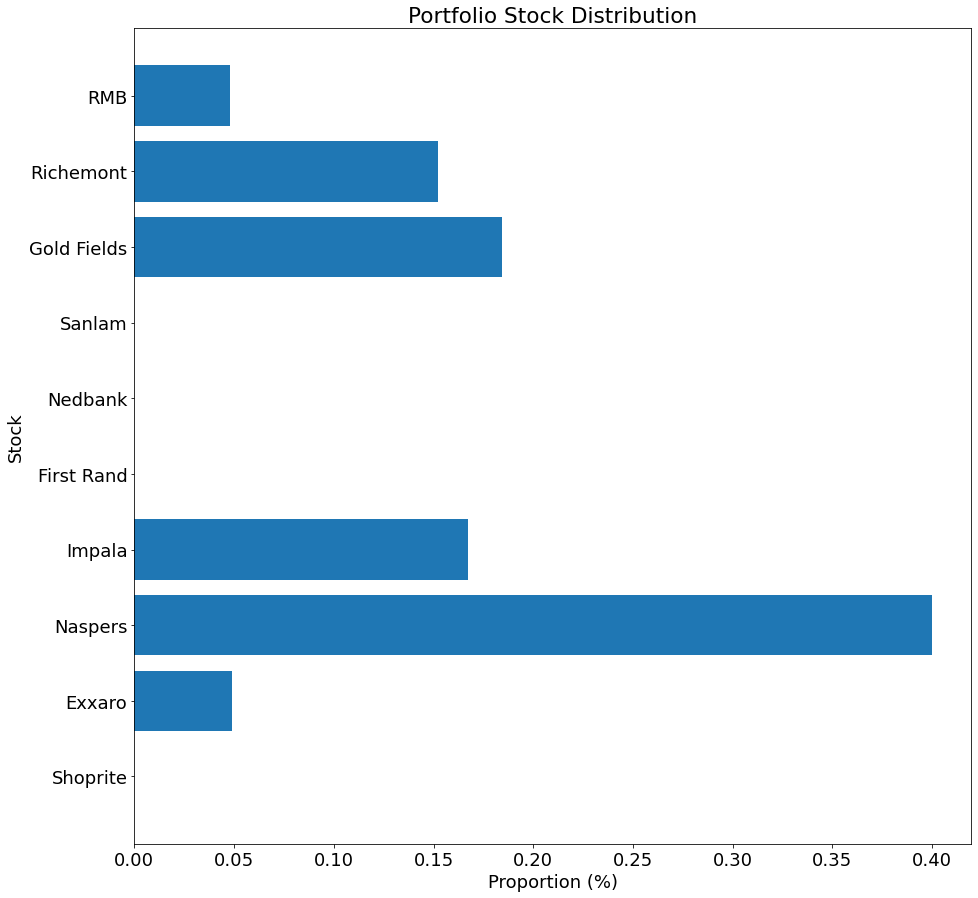

In [158]:
mylabels =  ['Shoprite','Exxaro','Naspers','Impala','First Rand','Nedbank','Sanlam','Gold Fields','Richemont','RMB']

Quantity = [320,450,300,120,280]
plt.figure(figsize = (15,15))
plt.barh(mylabels ,port_1)
plt.title('Portfolio Stock Distribution')
plt.ylabel('Stock')
plt.xlabel('Proportion (%)')
plt.show()

## (ii) 
Generate a random value uniformly in the interval [0:95 $\mu_i$; 1.05 $\mu_i$],
for each stock $i$. Resolve Markowitz's MVO model with these mean returns,
instead of $\mu_i$ as in (i). Compare the results obtained in (i) and (ii).

In [159]:
New_return = []
for stock in range(10):
    t = np.random.uniform(low = meanRet[stock]*0.95, high =meanRet[stock]*1.05)
    New_return.append(t)
New_return
    
    

[0.004954080041640561,
 0.23244827616861385,
 0.32579932201941747,
 0.5890735325457049,
 0.041907264786252535,
 -0.08168972592892736,
 0.0392039041944927,
 0.4287035825526925,
 0.15278826258057612,
 0.1895107798175774]

In [160]:
medianReturns = meanRet.median()
R = medianReturns
R

0.17454213695609255

In [161]:
np.linspace(R,0.4,50)

array([0.17454214, 0.17914332, 0.1837445 , 0.18834568, 0.19294686,
       0.19754804, 0.20214922, 0.2067504 , 0.21135158, 0.21595276,
       0.22055395, 0.22515513, 0.22975631, 0.23435749, 0.23895867,
       0.24355985, 0.24816103, 0.25276221, 0.25736339, 0.26196457,
       0.26656575, 0.27116694, 0.27576812, 0.2803693 , 0.28497048,
       0.28957166, 0.29417284, 0.29877402, 0.3033752 , 0.30797638,
       0.31257756, 0.31717874, 0.32177993, 0.32638111, 0.33098229,
       0.33558347, 0.34018465, 0.34478583, 0.34938701, 0.35398819,
       0.35858937, 0.36319055, 0.36779173, 0.37239291, 0.3769941 ,
       0.38159528, 0.38619646, 0.39079764, 0.39539882, 0.4       ])

In [162]:
returns1 = np.linspace(R,0.4,50)
def getReturn(w):
    w = np.array(w)
    R = np.sum(New_return*w)
    return R

for R in returns1:
    constraints = ({'type':'eq', 'fun':checkSumToOne},
                    {'type':'eq', 'fun':lambda w: getReturn(w) - R})
    opt = minimize(minimizeMyVolatility, w0,method = 'SLSQP', bounds = bounds, constraints = constraints)


In [163]:
port_2 = opt.x
port_2

array([0.00000000e+00, 5.32644693e-03, 4.97041187e-01, 2.45969858e-01,
       6.56397662e-17, 0.00000000e+00, 2.32948266e-17, 1.89824789e-01,
       3.17412845e-02, 3.00964343e-02])

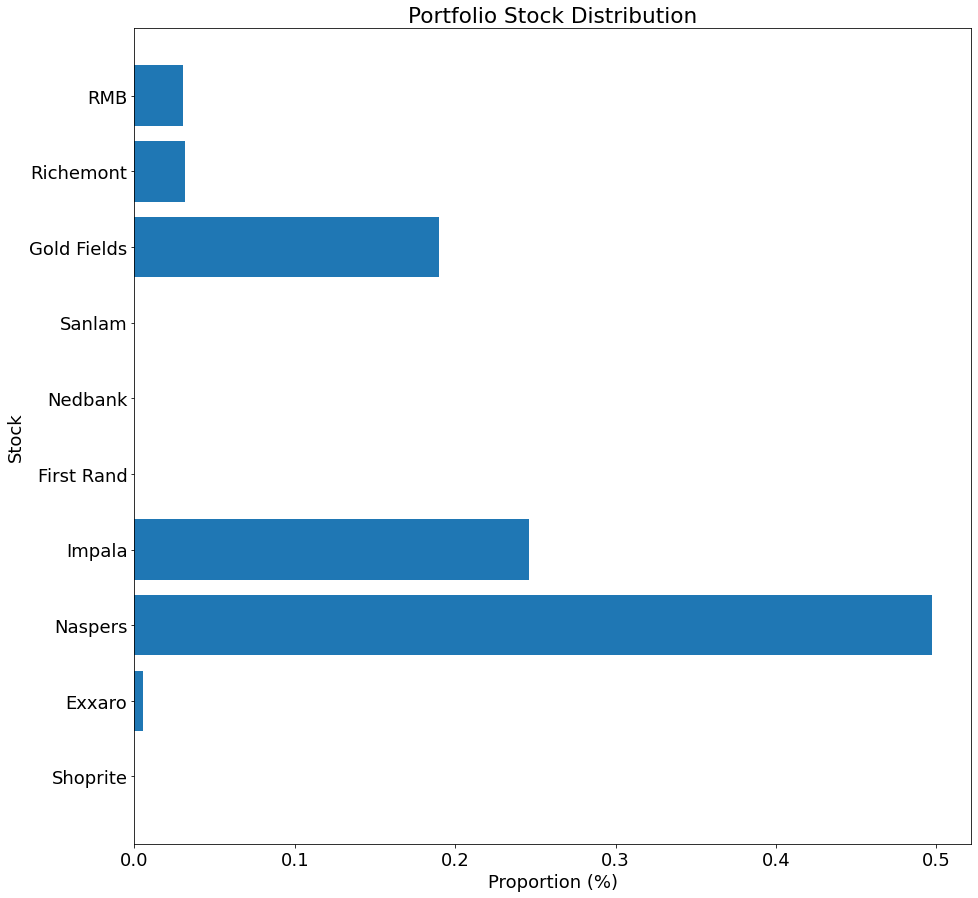

In [164]:
mylabels =  ['Shoprite','Exxaro','Naspers','Impala','First Rand','Nedbank','Sanlam','Gold Fields','Richemont','RMB']

plt.figure(figsize = (15,15))
plt.barh(mylabels ,port_2)
plt.title('Portfolio Stock Distribution')
plt.ylabel('Stock')
plt.xlabel('Proportion (%)')
plt.show()

(iii) Repeat three more times and average the five portfolios found in (i),
(ii) and (iii). Compare this portfolio with the one found in (i).

### (iii) Repeating (ii) Three additional times

In [165]:
New_return = []
for stock in range(10):
    t = np.random.uniform(low = meanRet[stock]*0.95, high =meanRet[stock]*1.05)
    New_return.append(t)
New_return

[0.004742442880823898,
 0.23368610500179282,
 0.32022573875819643,
 0.6125847062503451,
 0.042705269424226706,
 -0.07580290045241395,
 0.0373060165022068,
 0.4324152505903325,
 0.15843775509170965,
 0.20238427026301392]

In [166]:

def getReturn(w):
    w = np.array(w)
    R = np.sum(New_return*w)
    return R

for R in returns1:
    constraints = ({'type':'eq', 'fun':checkSumToOne},
                    {'type':'eq', 'fun':lambda w: getReturn(w) - R})
    opt = minimize(minimizeMyVolatility, w0,method = 'SLSQP', bounds = bounds, constraints = constraints)

In [167]:
port_3 = opt.x
port_3

array([0.00000000e+00, 9.98860636e-04, 4.60368431e-01, 2.54766718e-01,
       7.09927989e-18, 0.00000000e+00, 0.00000000e+00, 1.80850312e-01,
       6.30908219e-02, 3.99248560e-02])

In [168]:
New_return = []
for stock in range(10):
    t = np.random.uniform(low = meanRet[stock]*0.95, high =meanRet[stock]*1.05)
    New_return.append(t)
New_return
    

[0.005020567774724528,
 0.23225563146851078,
 0.2990790548685676,
 0.5949355280663218,
 0.04401197375885109,
 -0.08026202807771532,
 0.040177529972871655,
 0.43117682083804165,
 0.1450881110189736,
 0.20005503990505336]

In [169]:


def getReturn(w):
    w = np.array(w)
    R = np.sum(New_return*w)
    return R

for R in returns1:
    constraints = ({'type':'eq', 'fun':checkSumToOne},
                    {'type':'eq', 'fun':lambda w: getReturn(w) - R})
    opt = minimize(minimizeMyVolatility, w0,method = 'SLSQP', bounds = bounds, constraints = constraints)


In [170]:
port_4 = opt.x
port_4

array([3.30512057e-17, 1.39608223e-02, 4.54277999e-01, 2.74257255e-01,
       3.72539003e-17, 0.00000000e+00, 9.68729633e-18, 2.02466648e-01,
       1.05938015e-02, 4.44434753e-02])

In [171]:
New_return = []
for stock in range(10):
    t = np.random.uniform(low = meanRet[stock]*0.95, high =meanRet[stock]*1.05)
    New_return.append(t)
New_return

[0.004679650031942524,
 0.23689476760582956,
 0.31772687559668983,
 0.601723172250616,
 0.04111190238988746,
 -0.07736618682443659,
 0.03964895637983125,
 0.4479208360092431,
 0.14900825599046422,
 0.20257801737853143]

In [172]:


def getReturn(w):
    w = np.array(w)
    R = np.sum(New_return*w)
    return R

for R in returns1:
    constraints = ({'type':'eq', 'fun':checkSumToOne},
                    {'type':'eq', 'fun':lambda w: getReturn(w) - R})
    opt = minimize(minimizeMyVolatility, w0,method = 'SLSQP', bounds = bounds, constraints = constraints)

In [173]:
port_5 = opt.x
port_5

array([0.00000000e+00, 1.68602778e-02, 4.62857829e-01, 2.39584187e-01,
       2.27748383e-17, 4.08161108e-17, 0.00000000e+00, 2.02998463e-01,
       3.52295849e-02, 4.24696581e-02])

#### Determine the average of the five portfolios

In [174]:
portfoilios_5 = list(zip(port_1,port_2,port_3,port_4,port_5))

In [175]:
mean_port = np.mean(portfoilios_5,axis=1)
mean_port

array([6.61024114e-18, 1.72090778e-02, 4.54864500e-01, 2.36350007e-01,
       2.65535570e-17, 1.11442291e-17, 6.59642458e-18, 1.92099802e-01,
       5.85308359e-02, 4.09457784e-02])

In [176]:
df = pd.DataFrame(mean_port)
df = df.assign(Port_1 = port_1)
df = df.assign(Port_2 = port_2)
df = df.assign(Port_3 = port_3)
df = df.assign(Port_4 = port_4)
df = df.assign(Port_5 = port_5)
df = df.T
df = df.set_axis(['Mean_Port','port_1','port_2','port_3','port_4','port_5'], axis = 0) 
df.columns = ['Shoprite','Exxaro','Naspers','Impala','First Rand','Nedbank','Sanlam','Gold Fields','Richemont','RMB']
df


,Shoprite,Exxaro,Naspers,Impala,First Rand,Nedbank,Sanlam,Gold Fields,Richemont,RMB
Mean_Port,6.610241e-18,0.017209,0.454864,0.236350,2.655356e-17,1.114423e-17,6.596425e-18,0.192100,0.058531,0.040946
port_1,0.000000e+00,0.048899,0.399777,0.167172,0.000000e+00,1.490503e-17,0.000000e+00,0.184359,0.151999,0.047794
port_2,0.000000e+00,0.005326,0.497041,0.245970,6.563977e-17,0.000000e+00,2.329483e-17,0.189825,0.031741,0.030096
port_3,0.000000e+00,0.000999,0.460368,0.254767,7.099280e-18,0.000000e+00,0.000000e+00,0.180850,0.063091,0.039925
port_4,3.305121e-17,0.013961,0.454278,0.274257,3.725390e-17,0.000000e+00,9.687296e-18,0.202467,0.010594,0.044443
port_5,0.000000e+00,0.016860,0.462858,0.239584,2.277484e-17,4.081611e-17,0.000000e+00,0.202998,0.035230,0.042470


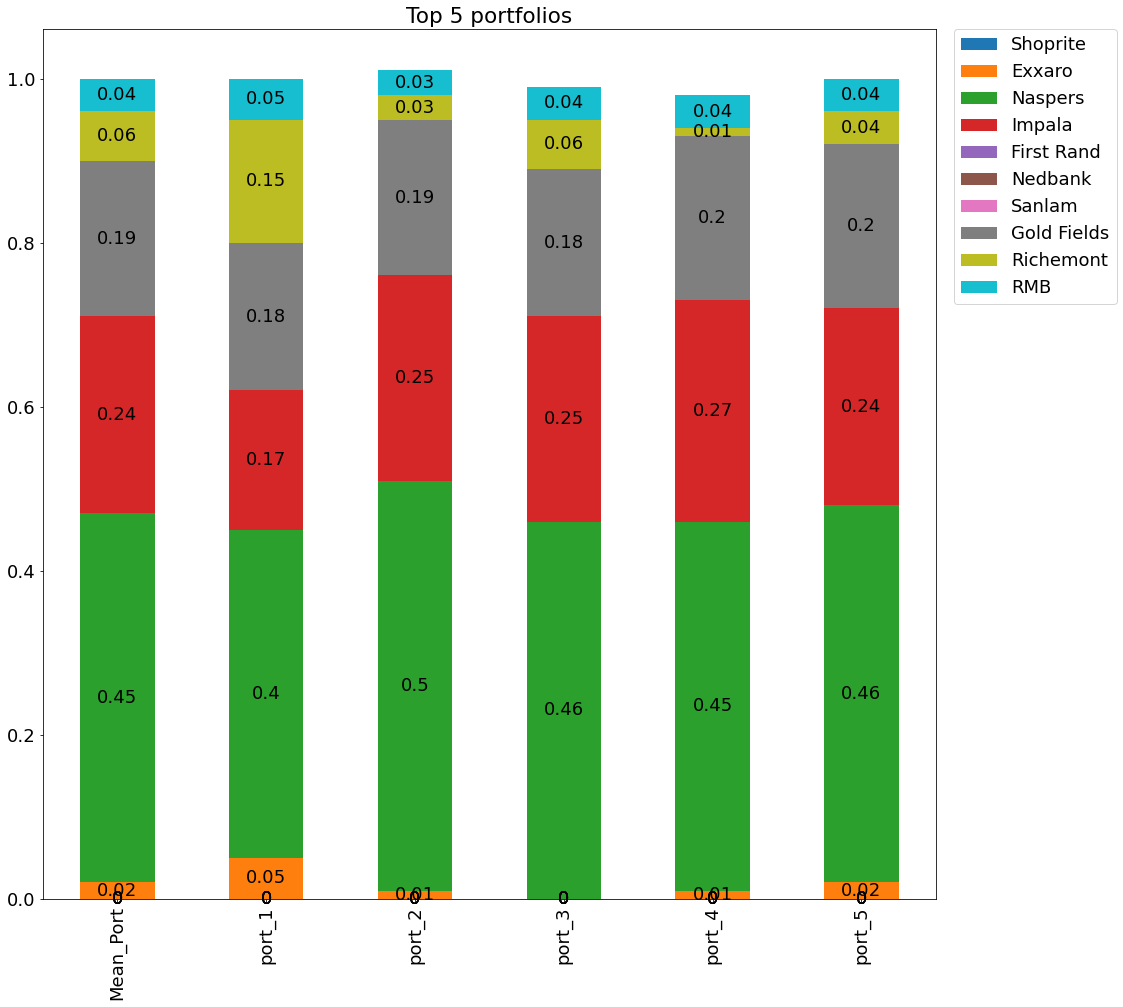

In [177]:
# create data

df =  df.round(2)
labels = ['Mean_Port','A','B','C','D','E']
df = df.assign(labels = labels)

# plot data in stack manner of bar type

ax_1 = df.plot(kind='bar', stacked=True,
        title='Top 5 portfolios',figsize = (16,16))

for c in ax_1.containers:

    # add the annotations
    ax_1.bar_label(c,  label_type='center')
   
   
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()